### Author/Writer : Supapong Sakulkoo  E-mail: kevinangas@gmail.com , auulovemoo@hotmail.com  

In [44]:
from pyfiglet import figlet_format
from termcolor import cprint 
cprint(figlet_format("Created by Supapong Sakulkoo",font="slant"),'blue',attrs=['bold','dark'])

   ______                __           __   __         
  / ____/_______  ____ _/ /____  ____/ /  / /_  __  __
 / /   / ___/ _ \/ __ `/ __/ _ \/ __  /  / __ \/ / / /
/ /___/ /  /  __/ /_/ / /_/  __/ /_/ /  / /_/ / /_/ / 
\____/_/   \___/\__,_/\__/\___/\__,_/  /_.___/\__, /  
                                             /____/   
   _____                                          
  / ___/__  ______  ____ _____  ____  ____  ____ _
  \__ \/ / / / __ \/ __ `/ __ \/ __ \/ __ \/ __ `/
 ___/ / /_/ / /_/ / /_/ / /_/ / /_/ / / / / /_/ / 
/____/\__,_/ .___/\__,_/ .___/\____/_/ /_/\__, /  
          /_/         /_/                /____/   
   _____       __         ____             
  / ___/____ _/ /____  __/ / /______  ____ 
  \__ \/ __ `/ //_/ / / / / //_/ __ \/ __ \
 ___/ / /_/ / ,< / /_/ / / ,< / /_/ / /_/ /
/____/\__,_/_/|_|\__,_/_/_/|_|\____/\____/ 
                                           



# 0. ติดตั้ง Library

In [32]:
!pip install beautifulsoup4
!pip install pyfiglet
!pip install termcolor

In [45]:
import webbrowser 
from bs4 import BeautifulSoup 
import requests

import pandas as pd 
pd.set_option('max_r',9999)

# 1. เปิดเว็บตัวอย่างที่เราใช้ในการ scrape ข้อมูล

In [2]:
url="https://www.imdb.com/search/title/?count=100&title_type=feature,tv_series&ref_=nv_wl_img_2"
webbrowser.open_new_tab(url)

True

web_data = requests.get(r"https://www.imdb.com/")
data = BeautifulSoup(web_data.text,'html.parser')
data.prettify()

In [3]:
web_data = requests.get("https://www.imdb.com/search/title/?count=100&title_type=feature,tv_series&ref_=nv_wl_img_2")
data = BeautifulSoup(web_data.text,'html.parser')
data.prettify()

'<!DOCTYPE html>\n<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>\n  <script type="text/javascript">\n   var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};\n  </script>\n  <script>\n   if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n  </script>\n  <script>\n   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);\n  </script>\n  <title>\n   Feature Film/TV Series\n(Sorted by Popularity Ascending) - IMDb\n  </title>\n  <script>\n   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);\n  </script>\n  <script>\n   if (typeof uet == \'function\') {\n      uet("be", "LoadTitle", {wb: 1});\n    }\n  </script>\n  <script>\n   if (type

# Beautiful Soup Object คือ อะไร

In [4]:
print('type ของตัวแปร web_data : ',type(web_data))
print('type ของตัวแปร data : ',type(data))

type ของตัวแปร web_data :  <class 'requests.models.Response'>
type ของตัวแปร data :  <class 'bs4.BeautifulSoup'>


# 2 .text จะสกัดเอาแต่ข้อมูล text ออกมาแบบไม่มี tag html ติดมาด้วย
# 2.1  BS4Object.title จะเอา tag title ของหน้าเว็บออกมา

In [5]:
print("web title : ",data.title,end="\n\n")
print("web title : ",data.title.text)

web title :  <title>Feature Film/TV Series
(Sorted by Popularity Ascending) - IMDb</title>

web title :  Feature Film/TV Series
(Sorted by Popularity Ascending) - IMDb


In [6]:
print(data.header)

None


# 3. ถ้าอยากได้ข้อมูลหนังทำยังไง

# 3.1 div class lister-list เก็บ list หนังทุกเรื่องไว้

In [7]:
movie_data = data.find('div',{'class':'lister-list'})
movie_data

<div class="lister-list">
<div class="lister-item mode-advanced">
<div class="lister-top-right">
<div class="ribbonize" data-caller="filmosearch" data-tconst="tt1877830"></div>
</div>
<div class="lister-item-image float-left">
<a href="/title/tt1877830/"> <img alt="The Batman" class="loadlate" data-tconst="tt1877830" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZTE2YTY3YTMtM2FlMS00YmI3LTgyMWUtM2FhMWIyZWRmMDk5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UY98_CR5,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a> </div>
<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt1877830/">The Batman</a>
<span class="lister-item-year text-muted unbold">(2021)</span>
</h3>
<p class="text-muted">
<span class="genre">
Action, Crime, Drama            </span>
<span class="ghost">|</span>
<b>Announced</b>
</p>
<p cla

# Search Year

In [8]:
movie_data.find_all('span',{'class':'lister-item-year text-muted unbold'})

[<span class="lister-item-year text-muted unbold">(2021)</span>,
 <span class="lister-item-year text-muted unbold">(2020)</span>,
 <span class="lister-item-year text-muted unbold">(2016– )</span>,
 <span class="lister-item-year text-muted unbold">(2021)</span>,
 <span class="lister-item-year text-muted unbold">(2020– )</span>,
 <span class="lister-item-year text-muted unbold">(2018– )</span>,
 <span class="lister-item-year text-muted unbold">(2020)</span>,
 <span class="lister-item-year text-muted unbold">(2020)</span>,
 <span class="lister-item-year text-muted unbold">(2020)</span>,
 <span class="lister-item-year text-muted unbold">(2019– )</span>,
 <span class="lister-item-year text-muted unbold">(2020)</span>,
 <span class="lister-item-year text-muted unbold">(2020)</span>,
 <span class="lister-item-year text-muted unbold">(2020)</span>,
 <span class="lister-item-year text-muted unbold">(IV) (2020)</span>,
 <span class="lister-item-year text-muted unbold">(2018)</span>,
 <span class

In [9]:
movie_data.find_all('div',{'class':'inline-block ratings-imdb-rating'})

[<div class="inline-block ratings-imdb-rating" data-value="7.9" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>7.9</strong>
 </div>,
 <div class="inline-block ratings-imdb-rating" data-value="8.2" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>8.2</strong>
 </div>,
 <div class="inline-block ratings-imdb-rating" data-value="7.4" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>7.4</strong>
 </div>,
 <div class="inline-block ratings-imdb-rating" data-value="8.5" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>8.5</strong>
 </div>,
 <div class="inline-block ratings-imdb-rating" data-value="6.4" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>6.4</strong>
 </div>,
 <div class="inline-block ratings-imdb-rating" data-value="5.6" name="ir">
 <span class="global-sprite rating-star imdb-rating"></span>
 <strong>5.6</strong>
 </div>

In [10]:
movie_data.find_all('div',{'class':'inline-block ratings-imdb-rating'})[0]['data-value']

'7.9'

In [11]:
Rating=[]
rate = movie_data.find_all('div',{'class':'inline-block ratings-imdb-rating'})
YEAR = movie_data.find_all('span',{'class':'lister-item-year text-muted unbold'})
for a,b in zip(rate,YEAR):
    Rating.append((a.text.strip(),b.text))

for k in Rating:
    print(k,end="\n\n")

('7.9', '(2021)')

('8.2', '(2020)')

('7.4', '(2016– )')

('8.5', '(2021)')

('6.4', '(2020– )')

('5.6', '(2018– )')

('8.7', '(2020)')

('6.0', '(2020)')

('6.7', '(2020)')

('5.3', '(2019– )')

('7.3', '(2020)')

('8.8', '(2020)')

('5.5', '(2020)')

('9.3', '(IV) (2020)')

('6.0', '(2018)')

('8.2', '(2018– )')

('8.8', '(2020)')

('7.2', '(2011–2019)')

('8.9', '(2020– )')

('7.6', '(I) (2013–2016)')

('7.7', '(2017–2020)')

('7.7', '(2018– )')

('1.0', '(2005–2013)')

('8.4', '(2005– )')

('5.6', '(2020– )')

('3.3', '(2014– )')

('9.5', '(2020)')

('6.2', '(2005–2020)')

('8.4', '(2020)')

('8.6', '(2020)')

('6.3', '(2008–2013)')

('8.1', '(2020)')

('8.5', '(2012–2014)')

('8.8', '(2011– )')

('8.5', '(I) (2020)')

('6.1', '(2020)')

('8.4', '(2005–2020)')

('7.9', '(2019)')

('8.6', '(2016– )')

('8.8', '(2013– )')

('8.2', '(2020)')

('8.8', '(2015–2020)')

('8.7', '(2019)')

('8.9', '(2020– )')

('8.5', '(2020)')

('8.7', '(2010)')

('8.4', '(2010– )')

('8.5', '(2013– )')

# 3.2 div class=lister-item-image float-left เก็บชื่อหนัง กับลิงค์โปสเตอร์หนังไว้

In [12]:
movie_detail=movie_data.find_all('div',{'class':"lister-item-image float-left"})
movie_detail

[<div class="lister-item-image float-left">
 <a href="/title/tt1877830/"> <img alt="The Batman" class="loadlate" data-tconst="tt1877830" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZTE2YTY3YTMtM2FlMS00YmI3LTgyMWUtM2FhMWIyZWRmMDk5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UY98_CR5,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
 </a> </div>,
 <div class="lister-item-image float-left">
 <a href="/title/tt6723592/"> <img alt="Tenet" class="loadlate" data-tconst="tt6723592" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BYzg0NGM2NjAtNmIxOC00MDJmLTg5ZmYtYzM0MTE4NWE2NzlhXkEyXkFqcGdeQXVyMTA4NjE0NjEy._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
 </a> </div>,
 <div class="lister-item-image float-left">
 <a href="/title/tt4052886/"> <img alt="Lucifer" class="loadlate" data-tconst="tt40

In [13]:
movie_detail[0].find('a')

<a href="/title/tt1877830/"> <img alt="The Batman" class="loadlate" data-tconst="tt1877830" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZTE2YTY3YTMtM2FlMS00YmI3LTgyMWUtM2FhMWIyZWRmMDk5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UY98_CR5,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>
</a>

In [14]:
movie_detail[0].find('a').find('img')

<img alt="The Batman" class="loadlate" data-tconst="tt1877830" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZTE2YTY3YTMtM2FlMS00YmI3LTgyMWUtM2FhMWIyZWRmMDk5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UY98_CR5,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>

In [15]:
movie_detail[0].find('a').find('img')['alt']

'The Batman'

movie title :  https://m.media-amazon.com/images/M/MV5BZTE2YTY3YTMtM2FlMS00YmI3LTgyMWUtM2FhMWIyZWRmMDk5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UY98_CR5,0,67,98_AL_.jpg


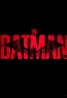

In [16]:
from IPython.display import Image
print('movie title : ',movie_detail[0].find('a').find('img')['loadlate'])
Image(movie_detail[0].find('a').find('img')['loadlate'],width=100,height=20)

In [17]:
M = []
for i in movie_detail:
    name = i.find('a').find('img')['alt']
    image = i.find('a').find('img')['loadlate']
    print(i.find('a').find('img')['alt'])
    print(i.find('a').find('img')['loadlate'])
    M.append((name,image))
print(M)

The Batman
https://m.media-amazon.com/images/M/MV5BZTE2YTY3YTMtM2FlMS00YmI3LTgyMWUtM2FhMWIyZWRmMDk5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UY98_CR5,0,67,98_AL_.jpg
Tenet
https://m.media-amazon.com/images/M/MV5BYzg0NGM2NjAtNmIxOC00MDJmLTg5ZmYtYzM0MTE4NWE2NzlhXkEyXkFqcGdeQXVyMTA4NjE0NjEy._V1_UX67_CR0,0,67,98_AL_.jpg
Lucifer
https://m.media-amazon.com/images/M/MV5BNzY1YjIxOGMtOTAyZC00YTcyLWFhMzQtZTJkYTljYzU0MGRlXkEyXkFqcGdeQXVyMTAwMzM3NDI3._V1_UX67_CR0,0,67,98_AL_.jpg
The Suicide Squad
https://m.media-amazon.com/images/M/MV5BMzEzNzEyM2EtODM3OC00NWM4LTk3OTEtZjg3YjEzYTM1Zjk2XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UX67_CR0,0,67,98_AL_.jpg
Lovecraft Country
https://m.media-amazon.com/images/M/MV5BM2ExMmZlZDQtOTJiZC00Y2UzLWIxNDYtZTdiYzAzYzQyMmQ4XkEyXkFqcGdeQXVyMTAwMzM3NDI3._V1_UX67_CR0,0,67,98_AL_.jpg
Yellowstone
https://m.media-amazon.com/images/M/MV5BZjhkNWM1NTQtODI4NS00NzllLTg1ODAtYjg3N2QxZjc3ZjRiXkEyXkFqcGdeQXVyNDIzMzcwNjc@._V1_UY98_CR2,0,67,98_AL_.jpg
Wonder Woman 1984
https://m.media-amazon.com/images

# ข้อมูลหนังทั้งหมดจะอยู่ที่ div class="lister-item-content" 

In [18]:
movie_all = data.find_all('div',{'class':"lister-item-content"}) 
print(movie_all)

[<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt1877830/">The Batman</a>
<span class="lister-item-year text-muted unbold">(2021)</span>
</h3>
<p class="text-muted">
<span class="genre">
Action, Crime, Drama            </span>
<span class="ghost">|</span>
<b>Announced</b>
</p>
<p class="text-muted">
    The plot is unknown.</p>
<p class="">
    Director:
<a href="/name/nm0716257/">Matt Reeves</a>
<span class="ghost">|</span> 
    Stars:
<a href="/name/nm1500155/">Robert Pattinson</a>, 
<a href="/name/nm0200452/">Paul Dano</a>, 
<a href="/name/nm2368789/">Zoë Kravitz</a>, 
<a href="/name/nm0268199/">Colin Farrell</a>
</p>
</div>, <div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">2.</span>
<a href="/title/tt6723592/">Tenet</a>
<span class="lister-item-year text-muted unbold">(2020)</span>
</h3>
<p class="text-muted">
<span c

In [19]:
print(movie_all[0])

<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt1877830/">The Batman</a>
<span class="lister-item-year text-muted unbold">(2021)</span>
</h3>
<p class="text-muted">
<span class="genre">
Action, Crime, Drama            </span>
<span class="ghost">|</span>
<b>Announced</b>
</p>
<p class="text-muted">
    The plot is unknown.</p>
<p class="">
    Director:
<a href="/name/nm0716257/">Matt Reeves</a>
<span class="ghost">|</span> 
    Stars:
<a href="/name/nm1500155/">Robert Pattinson</a>, 
<a href="/name/nm0200452/">Paul Dano</a>, 
<a href="/name/nm2368789/">Zoë Kravitz</a>, 
<a href="/name/nm0268199/">Colin Farrell</a>
</p>
</div>


In [20]:
genre = movie_all[0].find('span',{'class':'genre'}).text
director = movie_all[0].find('p',{'class':''}).text
print(genre)
print(director)


Action, Crime, Drama            

    Director:
Matt Reeves
| 
    Stars:
Robert Pattinson, 
Paul Dano, 
Zoë Kravitz, 
Colin Farrell



In [21]:
G = []
for i in movie_all:
    genre =i.find('span',{'class':'genre'}).text
    director = i.find('p',{'class':''}).text
    G.append((genre,director))
print(G)

[('\nAction, Crime, Drama            ', '\n    Director:\nMatt Reeves\n| \n    Stars:\nRobert Pattinson, \nPaul Dano, \nZoë Kravitz, \nColin Farrell\n'), ('\nAction, Sci-Fi            ', '\n    Director:\nChristopher Nolan\n| \n    Stars:\nJohn David Washington, \nRobert Pattinson, \nElizabeth Debicki, \nAaron Taylor-Johnson\n'), ('\nCrime, Drama, Fantasy            ', '\n            \n    Stars:\nTom Ellis, \nLauren German, \nKevin Alejandro, \nD.B. Woodside\n'), ('\nAction, Adventure, Fantasy            ', '\n    Director:\nJames Gunn\n| \n    Stars:\nMargot Robbie, \nTaika Waititi, \nJoel Kinnaman, \nAlice Braga\n'), ('\nDrama, Fantasy, Horror            ', '\n            \n    Stars:\nJonathan Majors, \nJurnee Smollett, \nCourtney B. Vance, \nMichael Kenneth Williams\n'), ('\nDrama, Western            ', '\n            \n    Stars:\nKevin Costner, \nLuke Grimes, \nKelly Reilly, \nWes Bentley\n'), ('\nAction, Adventure, Fantasy            ', '\n    Director:\nPatty Jenkins\n| \n    

In [22]:
from termcolor import cprint
Detail=[]
print(list(zip(M,G,Rating))[0])
for i,j,k in zip(M,G,Rating):
    Detail.append(i+j+k)
cprint(Detail,'magenta',attrs=['bold'])

(('The Batman', 'https://m.media-amazon.com/images/M/MV5BZTE2YTY3YTMtM2FlMS00YmI3LTgyMWUtM2FhMWIyZWRmMDk5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UY98_CR5,0,67,98_AL_.jpg'), ('\nAction, Crime, Drama            ', '\n    Director:\nMatt Reeves\n| \n    Stars:\nRobert Pattinson, \nPaul Dano, \nZoë Kravitz, \nColin Farrell\n'), ('7.9', '(2021)'))
[('The Batman', 'https://m.media-amazon.com/images/M/MV5BZTE2YTY3YTMtM2FlMS00YmI3LTgyMWUtM2FhMWIyZWRmMDk5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UY98_CR5,0,67,98_AL_.jpg', '\nAction, Crime, Drama            ', '\n    Director:\nMatt Reeves\n| \n    Stars:\nRobert Pattinson, \nPaul Dano, \nZoë Kravitz, \nColin Farrell\n', '7.9', '(2021)'), ('Tenet', 'https://m.media-amazon.com/images/M/MV5BYzg0NGM2NjAtNmIxOC00MDJmLTg5ZmYtYzM0MTE4NWE2NzlhXkEyXkFqcGdeQXVyMTA4NjE0NjEy._V1_UX67_CR0,0,67,98_AL_.jpg', '\nAction, Sci-Fi            ', '\n    Director:\nChristopher Nolan\n| \n    Stars:\nJohn David Washington, \nRobert Pattinson, \nElizabeth Debicki, \nAaron Taylor-Johns

In [23]:
for index,i in enumerate(Detail):
    cprint(f"row : {index} \n{i}",'yellow',attrs=['bold'],end="\n\n")

row : 0 
('The Batman', 'https://m.media-amazon.com/images/M/MV5BZTE2YTY3YTMtM2FlMS00YmI3LTgyMWUtM2FhMWIyZWRmMDk5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UY98_CR5,0,67,98_AL_.jpg', '\nAction, Crime, Drama            ', '\n    Director:\nMatt Reeves\n| \n    Stars:\nRobert Pattinson, \nPaul Dano, \nZoë Kravitz, \nColin Farrell\n', '7.9', '(2021)')

row : 1 
('Tenet', 'https://m.media-amazon.com/images/M/MV5BYzg0NGM2NjAtNmIxOC00MDJmLTg5ZmYtYzM0MTE4NWE2NzlhXkEyXkFqcGdeQXVyMTA4NjE0NjEy._V1_UX67_CR0,0,67,98_AL_.jpg', '\nAction, Sci-Fi            ', '\n    Director:\nChristopher Nolan\n| \n    Stars:\nJohn David Washington, \nRobert Pattinson, \nElizabeth Debicki, \nAaron Taylor-Johnson\n', '8.2', '(2020)')

row : 2 
('Lucifer', 'https://m.media-amazon.com/images/M/MV5BNzY1YjIxOGMtOTAyZC00YTcyLWFhMzQtZTJkYTljYzU0MGRlXkEyXkFqcGdeQXVyMTAwMzM3NDI3._V1_UX67_CR0,0,67,98_AL_.jpg', '\nCrime, Drama, Fantasy            ', '\n            \n    Stars:\nTom Ellis, \nLauren German, \nKevin Alejandro, \nD.B. Wood

In [25]:

df =pd.DataFrame(Detail,columns=['Name','Image','Genre','Director','Rating','Year'])
df

,Name,Image,Genre,Director,Rating,Year
0,The Batman,https://m.media-amazon.com/images/M/MV5BZTE2YT...,"\nAction, Crime, Drama",\n Director:\nMatt Reeves\n| \n Stars:\n...,7.9,(2021)
1,Tenet,https://m.media-amazon.com/images/M/MV5BYzg0NG...,"\nAction, Sci-Fi",\n Director:\nChristopher Nolan\n| \n St...,8.2,(2020)
2,Lucifer,https://m.media-amazon.com/images/M/MV5BNzY1Yj...,"\nCrime, Drama, Fantasy","\n \n Stars:\nTom Ellis, \nLaure...",7.4,(2016– )
3,The Suicide Squad,https://m.media-amazon.com/images/M/MV5BMzEzNz...,"\nAction, Adventure, Fantasy",\n Director:\nJames Gunn\n| \n Stars:\nM...,8.5,(2021)
4,Lovecraft Country,https://m.media-amazon.com/images/M/MV5BM2ExMm...,"\nDrama, Fantasy, Horror","\n \n Stars:\nJonathan Majors, \...",6.4,(2020– )
5,Yellowstone,https://m.media-amazon.com/images/M/MV5BZjhkNW...,"\nDrama, Western","\n \n Stars:\nKevin Costner, \nL...",5.6,(2018– )
6,Wonder Woman 1984,https://m.media-amazon.com/images/M/MV5BZGVhZD...,"\nAction, Adventure, Fantasy",\n Director:\nPatty Jenkins\n| \n Stars:...,8.7,(2020)
7,Bill & Ted Face the Music,https://m.media-amazon.com/images/M/MV5BOTRiNz...,"\nAdventure, Comedy, Music",\n Director:\nDean Parisot\n| \n Stars:\...,6.0,(2020)
8,The New Mutants,https://m.media-amazon.com/images/M/MV5BMTgwMm...,"\nAction, Horror, Sci-Fi",\n Director:\nJosh Boone\n| \n Stars:\nM...,6.7,(2020)
9,The Boys,https://m.media-amazon.com/images/M/MV5BNGEyOG...,"\nAction, Comedy, Crime","\n \n Stars:\nKarl Urban, \nJack...",5.3,(2019– )


# Special : โปรแกรม Search Engine ใน Pandas

In [27]:
x = input("Search your movie : ")
df['indexes'] = df['Name'].str.find(x,0)
df[df['indexes']==0]

Search your movie : s


,Name,Image,Genre,Director,Rating,Year,indexes


# No Case Sensitive Search

In [28]:
x = input("Search your movie : ")
df[df['Name'].str.contains(x, case=False)]

Search your movie : Mulan


,Name,Image,Genre,Director,Rating,Year,indexes
56,Mulan,https://m.media-amazon.com/images/M/MV5BNDliY2...,"\nAction, Adventure, Drama",\n Director:\nNiki Caro\n| \n Stars:\nYi...,9.2,(2020),-1


# Final Search Engine

In [31]:
from termcolor import colored

column_search = input(colored("Search your column movie : ",'blue',attrs=['bold']))
row_search =  input(colored("Search your row movie : ",'cyan',attrs=['bold']))
df[df[column_search].str.contains(row_search, case=False)]



Search your column movie : Year
Search your row movie : 2020


,Name,Image,Genre,Director,Rating,Year,indexes
1,Tenet,https://m.media-amazon.com/images/M/MV5BYzg0NG...,"\nAction, Sci-Fi",\n Director:\nChristopher Nolan\n| \n St...,8.2,(2020),-1
4,Lovecraft Country,https://m.media-amazon.com/images/M/MV5BM2ExMm...,"\nDrama, Fantasy, Horror","\n \n Stars:\nJonathan Majors, \...",6.4,(2020– ),-1
6,Wonder Woman 1984,https://m.media-amazon.com/images/M/MV5BZGVhZD...,"\nAction, Adventure, Fantasy",\n Director:\nPatty Jenkins\n| \n Stars:...,8.7,(2020),-1
7,Bill & Ted Face the Music,https://m.media-amazon.com/images/M/MV5BOTRiNz...,"\nAdventure, Comedy, Music",\n Director:\nDean Parisot\n| \n Stars:\...,6.0,(2020),22
8,The New Mutants,https://m.media-amazon.com/images/M/MV5BMTgwMm...,"\nAction, Horror, Sci-Fi",\n Director:\nJosh Boone\n| \n Stars:\nM...,6.7,(2020),14
10,Project Power,https://m.media-amazon.com/images/M/MV5BYzBhOW...,"\nAction, Crime, Sci-Fi","\n Directors:\nHenry Joost, \nAriel Schulma...",7.3,(2020),-1
11,Enola Holmes,https://m.media-amazon.com/images/M/MV5BZjNkNz...,"\nAdventure, Crime, Drama",\n Director:\nHarry Bradbeer\n| \n Stars...,8.8,(2020),11
12,The One and Only Ivan,https://m.media-amazon.com/images/M/MV5BZWY3OT...,"\nAnimation, Adventure, Comedy",\n Director:\nThea Sharrock\n| \n Stars:...,5.5,(2020),-1
13,Ava,https://m.media-amazon.com/images/M/MV5BMTMzMT...,"\nAction, Crime, Drama",\n Director:\nTate Taylor\n| \n Stars:\n...,9.3,(IV) (2020),-1
16,The Sleepover,https://m.media-amazon.com/images/M/MV5BZmE1Mj...,"\nAction, Adventure, Comedy",\n Director:\nTrish Sie\n| \n Stars:\nSa...,8.8,(2020),-1


In [190]:
df['Name'].str.contains(x, case=False)

0     False
1      True
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83  

In [196]:
st = "Hello World EiEi"
print(st.__contains__("hello"))
print(st.__contains__("Hello"))

False
True


In [213]:
import re 
print(re.search("^H|^W",st).span()) #Return ตำแหน่งที่เจอ 
print(re.search("^H\w+",st).group()) # Return คำ(Word) ที่เจอ 
print(re.search("^H|^W",st).string) # Show ค่าของ String ที่ Pass เข้ามาในฟังก์ชัน

(0, 1)
Hello
Hello World EiEi


In [175]:
movie_detail[0].find('a').find('img')

<img alt="The Batman" class="loadlate" data-tconst="tt1877830" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZTE2YTY3YTMtM2FlMS00YmI3LTgyMWUtM2FhMWIyZWRmMDk5XkEyXkFqcGdeQXVyMTkxNjUyNQ@@._V1_UY98_CR5,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/G/01/imdb/images/nopicture/large/film-184890147._CB466725069_.png" width="67"/>

In [160]:
movie_data.find('div',{'class':'lister-item-content'})

<div class="lister-item-content">
<h3 class="lister-item-header">
<span class="lister-item-index unbold text-primary">1.</span>
<a href="/title/tt1877830/">The Batman</a>
<span class="lister-item-year text-muted unbold">(2021)</span>
</h3>
<p class="text-muted">
<span class="genre">
Action, Crime, Drama            </span>
<span class="ghost">|</span>
<b>Announced</b>
</p>
<p class="text-muted">
    The plot is unknown.</p>
<p class="">
    Director:
<a href="/name/nm0716257/">Matt Reeves</a>
<span class="ghost">|</span> 
    Stars:
<a href="/name/nm1500155/">Robert Pattinson</a>, 
<a href="/name/nm0200452/">Paul Dano</a>, 
<a href="/name/nm2368789/">Zoë Kravitz</a>, 
<a href="/name/nm0268199/">Colin Farrell</a>
</p>
</div>

In [161]:
print(movie_data.find('div',{'class':'lister-item-content'}).find('span',{'class','lister-item-year text-muted unbold'}).text)
print(movie_data.find('div',{'class':'lister-item-content'}).find('span',{'class','genre'}).text)
print(movie_data.find('div',{'class':'lister-item-content'}).find('p',{'class',''}).text)

(2021)

Action, Crime, Drama            

    Director:
Matt Reeves
| 
    Stars:
Robert Pattinson, 
Paul Dano, 
Zoë Kravitz, 
Colin Farrell



In [162]:
import re 
re.sub("|","",movie_data.find('div',{'class':'lister-item-content'}).find('p',{'class',''}).text)

'\n    Director:\nMatt Reeves\n| \n    Stars:\nRobert Pattinson, \nPaul Dano, \nZoë Kravitz, \nColin Farrell\n'